# Nueva sección

**Práctica 01: Estadística Inferencial y** **Muestreo**

Parte 1: Cargar la base de datos



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("ResultadosSabanetaSaber11.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          583 non-null    int64 
 1   Sector       583 non-null    object
 2   Colegio      583 non-null    object
 3   Código DANE  583 non-null    int64 
 4   Indicador    583 non-null    object
 5   Resultado    583 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 27.5+ KB
None
Primeras filas del dataset
    Año   Sector                       Colegio   Código DANE  \
0  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
1  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
2  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
3  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
4  2016  Público  I.E. Adelaida Correa Estrada  105631000050   

                               Indicador  Resultado  
0         Establecimie

2. Limpieza de los datos


Valores faltantes por columna:
Año            0
Sector         0
Colegio        0
Código DANE    0
Indicador      0
Resultado      0
dtype: int64


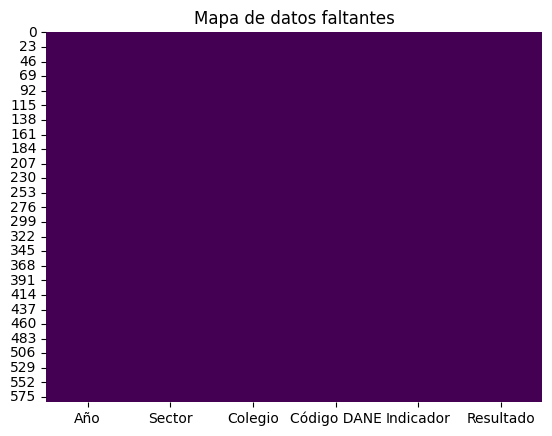

In [ ]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())
# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()

3. Gráficos de torta para variables categóricas

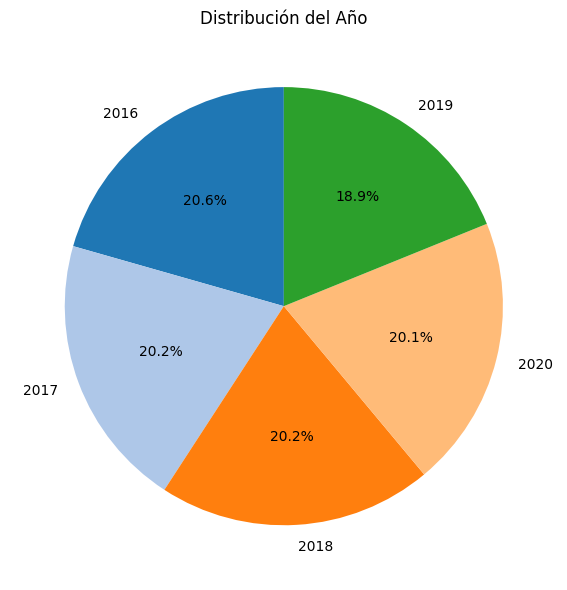

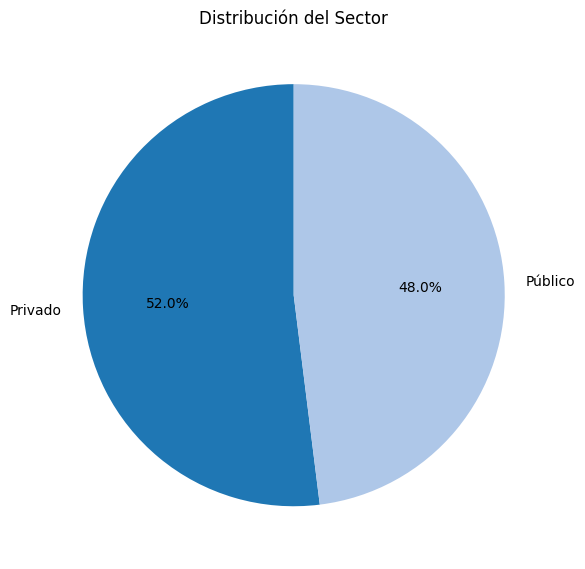

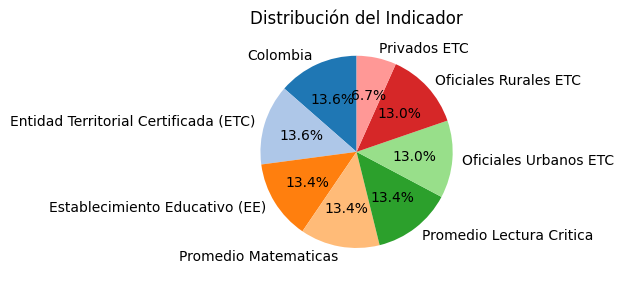

In [ ]:
import matplotlib.pyplot as plt

# Lista de variables categóricas y títulos para los gráficos
categorical_vars = [
    ('Año', 'Distribución del Año'),
    ('Sector', 'Distribución del Sector'),
    ('Indicador', 'Distribución del Indicador'),
]

for var, title in categorical_vars:
    plt.figure(figsize=(6, 6))
    new_df[var].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(title)
    plt.ylabel('')  # Eliminar la etiqueta del eje y
    plt.tight_layout()
    plt.show()

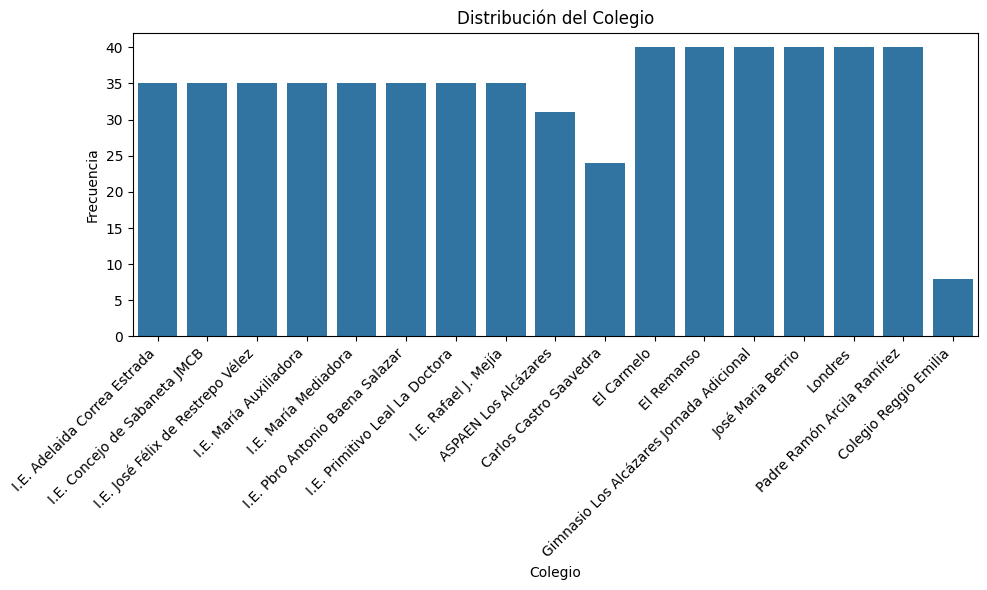

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='Colegio')
plt.title('Distribución del Colegio')
plt.xlabel('Colegio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Mejora la legibilidad de las etiquetas
plt.tight_layout()
plt.show()

3.1  Diagrama de cajas para variables numéricas

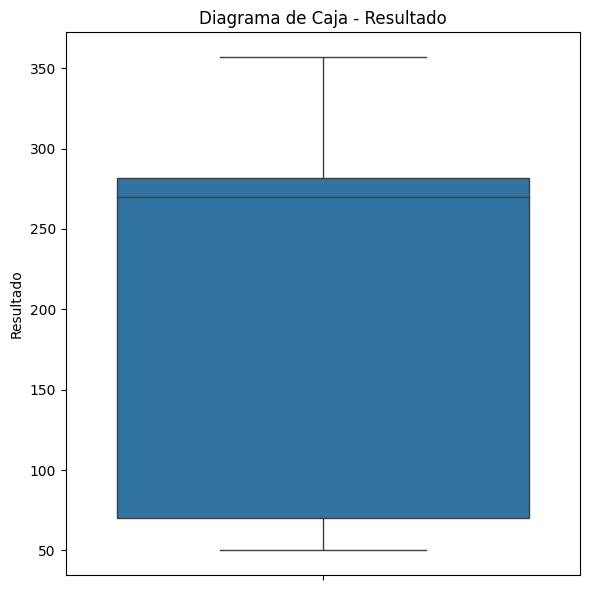

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diagrama de caja para Resultado
plt.figure(figsize=(6, 6))
sns.boxplot(y=new_df['Resultado'])
plt.title('Diagrama de Caja - Resultado')
plt.tight_layout()
plt.show()

4. Análisis de outliers (valores atípicos)

In [ ]:
# Calcular Q1, Q3 e IQR para 'Resultado'
Q1 = df['Resultado'].quantile(0.25)
Q3 = df['Resultado'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar un dato como atípico
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers en 'Resultado'
condicion = (df['Resultado'] >= limite_inferior) & (df['Resultado'] <= limite_superior)
df_sinatipicos_resultado = df[condicion]

# Mostrar la cantidad de datos restantes
print(f"Número de datos restantes después de eliminar outliers en 'Resultado': {len(df_sinatipicos_resultado)}")

Número de datos restantes después de eliminar outliers en 'Resultado': 583


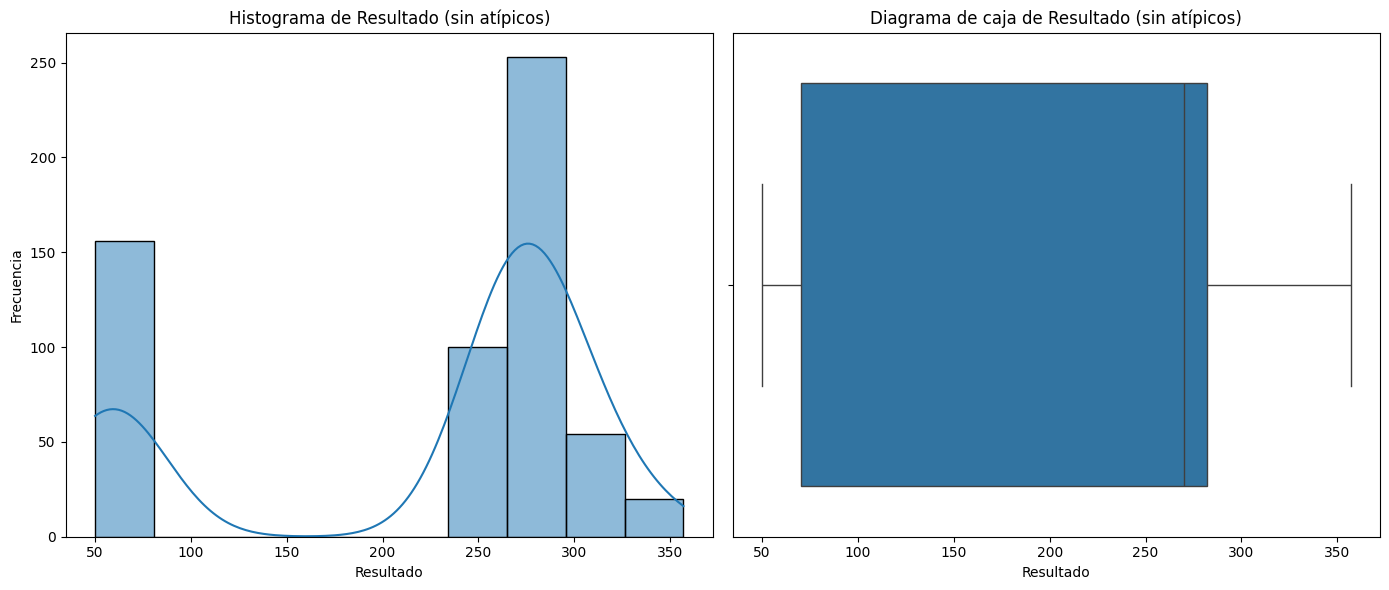

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma para Resultado
sns.histplot(df_sinatipicos_resultado['Resultado'], bins=10, edgecolor='black', kde=True, ax=axes[0])
axes[0].set_xlabel('Resultado')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma de Resultado (sin atípicos)')

# Boxplot para Resultado
sns.boxplot(x=df_sinatipicos_resultado['Resultado'], ax=axes[1])
axes[1].set_xlabel('Resultado')
axes[1].set_title('Diagrama de caja de Resultado (sin atípicos)')

plt.tight_layout()
plt.show()

4.1 Análisis de normalidad de las variables después de eliminar outliers

Resultados de los tests de normalidad (valores p):

Variable: Resultado
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0000
  Anderson-Darling Estadístico: 80.5745, Crítico (5%): 0.7820
  Jarque-Bera p = 0.0000
  → NO es distribución normal (según mayoría de tests)



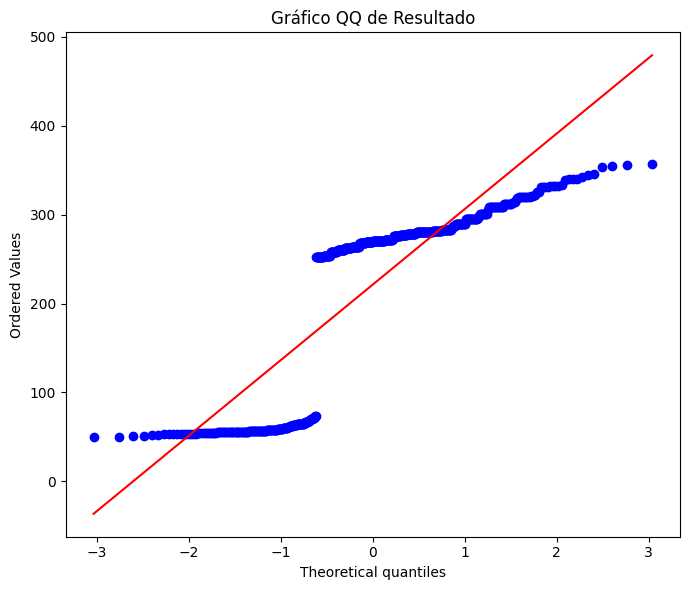

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot

# Lista de variables a evaluar
columnas_a_evaluar = ['Resultado']

# Diccionario para almacenar resultados
resultados_normalidad = {}

# Evaluar cada variable
for col in columnas_a_evaluar:
    if col in df.columns:
        datos = df[col].dropna()
        if len(datos) > 3:  # Shapiro-Wilk requires at least 3 data points
            # Shapiro-Wilk
            stat_sw, p_sw = shapiro(datos)
            # Kolmogorov-Smirnov
            media, desv = np.mean(datos), np.std(datos)
            stat_ks, p_ks = kstest(datos, "norm", args=(media, desv))
            # Anderson-Darling
            resultado_ad = anderson(datos)
            stat_ad = resultado_ad.statistic
            crit_ad = resultado_ad.critical_values[2]  # 5%
            ad_normal = stat_ad < crit_ad
            # Jarque-Bera
            stat_jb, p_jb = jarque_bera(datos)
            # Guardar resultados
            resultados_normalidad[col] = {
                'Shapiro-Wilk': p_sw,
                'Kolmogorov-Smirnov': p_ks,
                'Anderson-Darling': f'Estadístico: {stat_ad:.4f}, Crítico (5%): {crit_ad:.4f}',
                'Jarque-Bera': p_jb,
                'Normal': sum([
                    p_sw > 0.05,
                    p_ks > 0.05,
                    ad_normal,
                    p_jb > 0.05
                ]) >= 3
            }
        else:
            resultados_normalidad[col] = "Not enough data points for normality tests (requires at least 3)."


# Mostrar resultados en tabla
print("Resultados de los tests de normalidad (valores p):\n")
for var, res in resultados_normalidad.items():
    print(f"Variable: {var}")
    if isinstance(res, str):
        print(res)
    else:
        print(f"  Shapiro-Wilk p = {res['Shapiro-Wilk']:.4f}")
        print(f"  Kolmogorov-Smirnov p = {res['Kolmogorov-Smirnov']:.4f}")
        print(f"  Anderson-Darling {res['Anderson-Darling']}")
        print(f"  Jarque-Bera p = {res['Jarque-Bera']:.4f}")
        if res['Normal']:
            print("  → Distribución normal (según mayoría de tests)\n")
        else:
            print("  → NO es distribución normal (según mayoría de tests)\n")

# Gráficos QQ para cada variable
if columnas_a_evaluar:
    fig, axes = plt.subplots(1, len(columnas_a_evaluar), figsize=(7 * len(columnas_a_evaluar), 6))
    # Ensure axes is an array even for a single subplot
    if len(columnas_a_evaluar) == 1:
        axes = [axes]
    for i, col in enumerate(columnas_a_evaluar):
        if col in df.columns and len(df[col].dropna()) > 0:
            probplot(df[col].dropna(), dist="norm", plot=axes[i])
            axes[i].set_title(f"Gráfico QQ de {col}")
    plt.tight_layout()
    plt.show()
else:
    print("No columns specified for QQ plots.")